##Author  Braham Parkash
## GRIP - The Spark Foundation
## Data Science & Business Analytics Internship
## Task 1 Predict the percentage of marks of an student based on the number of study hours
# Prediction
To predict the score of a student who studies for 9.25 hrs/ day .We will predict the marks of that a student is expected to score based upon the number of hours they studied.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print("Reading the CSV file.")
data=pd.read_csv('student_scores.csv')

Reading the CSV file.


In [ ]:
print("Displaying the top 5 rows")
data.head()

Displaying the top 5 rows


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
print('Data has {} number of rows and {} columns'.format(data.shape[0],data.shape[1]))

Data has 25 number of rows and 2 columns


In [ ]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.groupby('Hours')['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

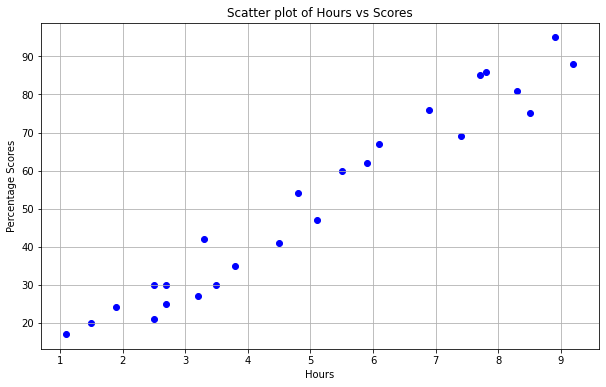

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data['Hours'],data['Scores'],color='b',marker='o')
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Percentage Scores")
plt.title('Scatter plot of Hours vs Scores')
plt.show()

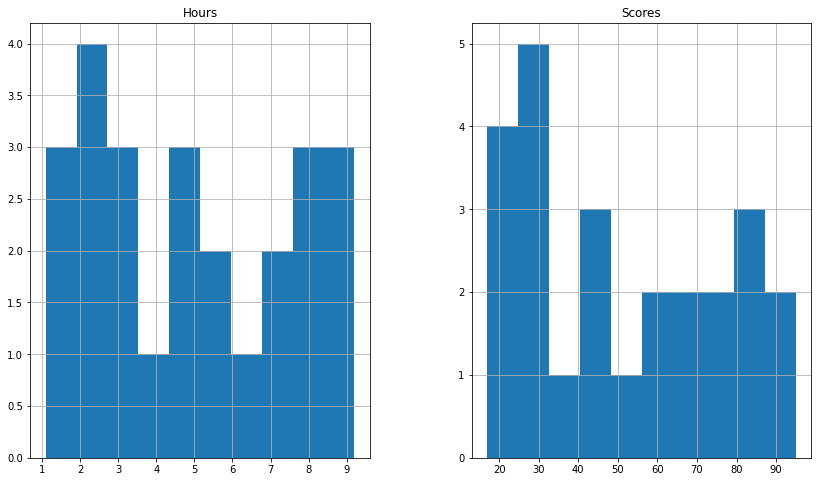

In [ ]:
data.hist(figsize=(14,8))
plt.show()

A histogram gives us an idea about nature of distribution of data i.e. whether the data is normally distributed or it is skewed either positively or negetively. In the above histogram, we can observe for both Hours and Scores, there is a very minor skew in the positive side because many of the data points lies in this region though this very slight skew does not indicate that outliers are present in the data.

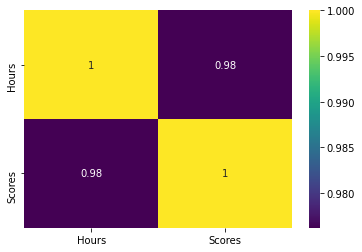

In [ ]:
sns.heatmap(data.corr(),annot=True,fmt='.2g',cmap='viridis')

In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


* Hours and Scores are highly Positively correlated to each other

## lmplot
Implot() is one of the most widely used function to quickly plot the Linear Relationship between 2 variables

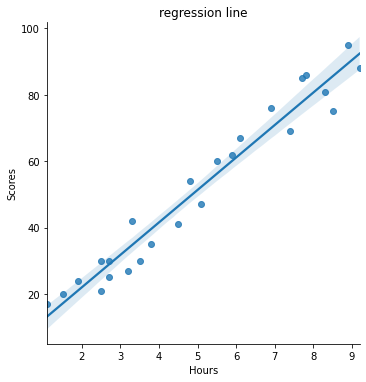

In [ ]:
sns.lmplot(x='Hours',y='Scores',data=data)
plt.title('regression line')
plt.show()

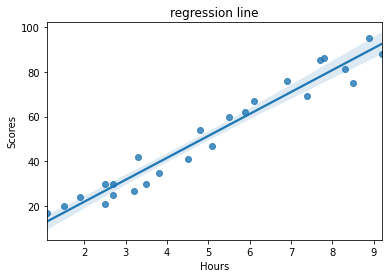

In [ ]:
sns.regplot(x='Hours',y='Scores',data=data)
plt.title('regression line')
plt.show()

From the graph above, we can clearly observe that there is a positive linear relationship between the number of hours studied and the scores obtained. We can say that with the increase of Hours studied(x), there is an increase in the scores obtained(y).



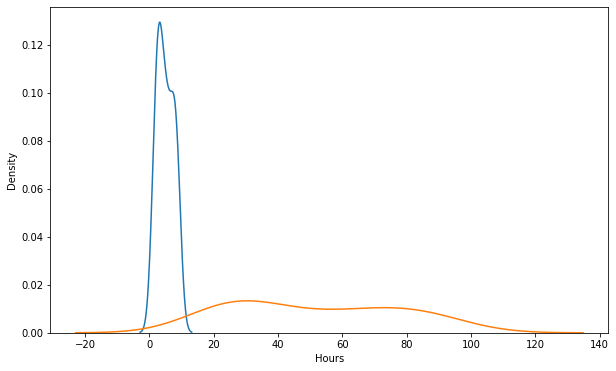

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data['Hours'],legend='Hours')
sns.kdeplot(data['Scores'],legend='Scores')
plt.show()

skewness of scores is : 0.2339646665397317


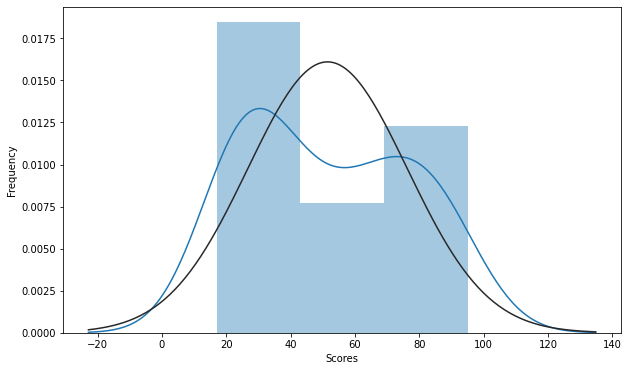

mu: 51.48 sigma: 24.775988375844868


In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
print("skewness of scores is :", data['Scores'].skew())
plt.figure(figsize=(10,6))
sns.distplot(data['Scores'],fit=norm)
mu,sigma=norm.fit(data['Scores'])
plt.ylabel('Frequency')
plt.show()
print('mu:',str(mu),'sigma:',str(sigma))

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

In [ ]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

* Splitting the dataset into the Training set and Test set


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 95)

##Training the Simple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred

array([45.29073881, 76.53669095, 68.72520291, 25.76201873, 48.22004683,
       33.57350676, 58.96084287, 91.18323101])

In [ ]:
# Comparing Actual vs Predicted
df1=pd.DataFrame({'actual':y_test,'predicted':y_pred})
df1

,actual,predicted
0,41,45.290739
1,85,76.536691
2,76,68.725203
3,30,25.762019
4,54,48.220047
5,42,33.573507
6,62,58.960843
7,88,91.183231


In [ ]:
def visualize(x,y,model,title):
  plt.scatter(x,y,color='red',marker='o')
  plt.plot(x,model.predict(x),color='blue')
  plt.title(title)
  plt.xlabel('X_Plane - Hours')

  plt.ylabel('Y_Plane - Scores')
  plt.show()

##Visualising the Training set results

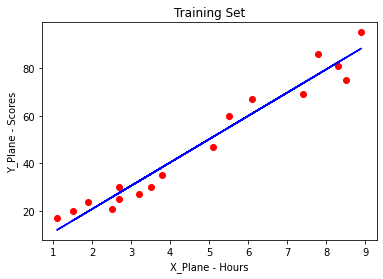

In [ ]:
visualize(X_train,y_train,lr,'Training Set')

## Visualising the Test set results

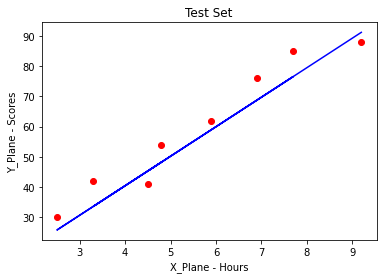

In [ ]:
visualize(X_test,y_test,lr,'Test Set')

In [ ]:
##Evaluating the model - to check its perfomance
from sklearn.metrics import mean_squared_error,mean_squared_log_error,r2_score


R-squared is a goodness-of-fit measure for linear regression models. As we can see that R-squared value is approx 0.955. r squared value basically tells us how much variance is explaned by dependent variable is explained by independent variables. In this case, around 95.5% of variance is explained which is a very good score as per industry standards.

The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs

In [ ]:
print('mean_squared_error :',mean_squared_error(y_test,y_pred))

print('mean_squared_log_error :',mean_squared_log_error(y_test,y_pred))

print('r2_score :',r2_score(y_test,y_pred))


mean_squared_error : 35.58803503032817
mean_squared_log_error : 0.014404263100547189
r2_score : 0.9134505912015123


In [ ]:
#predicting the given data point:
data_1=np.array([[9.25]])
res=lr.predict(data_1)
print("Predicted Score = {}".format(res[0]))


Predicted Score = 91.67144901144641


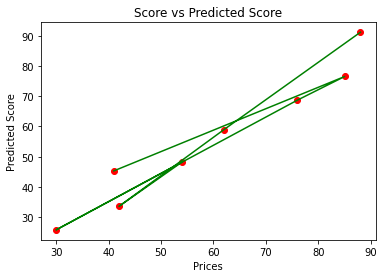

In [ ]:
plt.scatter(y_test,y_pred,c='r')
plt.plot(y_test,y_pred,c='g')
plt.xlabel("Prices")
plt.ylabel("Predicted Score")
plt.title("Score vs Predicted Score")
plt.show()

## Feature Engineering:


In [ ]:
#let us do some feature engineering on our data as we know that the dataset is very small so trying some new things will not take much effort and it might improve our error

In [ ]:
data.head(3)

,Hours,Scores,Minutes,Seconds,Days
0,0.172840,21,0.172840,-0.135797,0.376315
1,0.493827,47,0.493827,-0.135786,1.327389
2,0.259259,27,0.259259,-0.135794,0.632373


In [ ]:
#converting Hours to minutes ,seconds, days

data['Minutes']=data['Hours']*60
data['Seconds']=data['Hours']*60*60
data['Days']=data['Hours']/24.0

In [ ]:
data.head()

,Hours,Scores,Minutes,Seconds,Days
0,2.5,21,150.0,9000.0,0.104167
1,5.1,47,306.0,18360.0,0.212500
2,3.2,27,192.0,11520.0,0.133333
3,8.5,75,510.0,30600.0,0.354167
4,3.5,30,210.0,12600.0,0.145833


In [ ]:
def scaler(x,col):
  min=data[col].min()
  max=data[col].max()
  if (max!=min):
    return (x-min)/(max-min)
  else:
    print('max and min values are same')


In [ ]:
data['Minutes']=data['Minutes'].apply(lambda x: scaler(x,'Minutes'))
data['Hours']=data['Hours'].apply(lambda x: scaler(x,'Hours'))
data['Seconds']=data['Minutes'].apply(lambda x: scaler(x,'Seconds'))
data['Days']=data['Minutes'].apply(lambda x: scaler(x,'Days'))

In [ ]:
data.head()

,Hours,Scores,Minutes,Seconds,Days
0,0.172840,21,0.172840,-0.135797,0.376315
1,0.493827,47,0.493827,-0.135786,1.327389
2,0.259259,27,0.259259,-0.135794,0.632373
3,0.913580,75,0.913580,-0.135771,2.571102
4,0.296296,30,0.296296,-0.135792,0.742112


In [ ]:
y=data.Scores
X=data.drop('Scores',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 95)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [ ]:
y_pred

array([45.875     , 78.34193878, 70.22520408, 25.58316327, 48.91877551,
       33.69989796, 60.07928571, 93.56081633, 86.45867347])

In [ ]:
lr.coef_

array([7.62415797e+00, 7.62415797e+00, 2.61459464e-04, 2.25900977e+01])

In [ ]:
lr.intercept_

14.446704103698103

In [ ]:

# Comparing Actual vs Predicted
df1=pd.DataFrame({'actual':y_test,'predicted':y_pred})
df1

,actual,predicted
12,41,45.875000
10,85,78.341939
23,76,70.225204
16,30,25.583163
21,54,48.918776
13,42,33.699898
11,62,60.079286
6,88,93.560816
3,75,86.458673


In [ ]:
print('mean_squared_error :',mean_squared_error(y_test,y_pred))

print('mean_squared_log_error :',mean_squared_log_error(y_test,y_pred))

print('r2_score :',r2_score(y_test,y_pred))


mean_squared_error : 42.397297152806715
mean_squared_log_error : 0.014222328882571569
r2_score : 0.890860577468463


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

In [ ]:
dt_pred

array([47., 86., 69., 21., 47., 27., 67., 95., 81.])

In [ ]:

# Comparing Actual vs Predicted
df1=pd.DataFrame({'actual':y_test,'predicted':dt_pred})
df1

,actual,predicted
12,41,47.0
10,85,86.0
23,76,69.0
16,30,21.0
21,54,47.0
13,42,27.0
11,62,67.0
6,88,95.0
3,75,81.0


In [ ]:

print('mean_squared_error :',mean_squared_error(y_test,dt_pred))

print('mean_squared_log_error :',mean_squared_log_error(y_test,dt_pred))

print('r2_score :',r2_score(y_test,dt_pred))


mean_squared_error : 61.22222222222222
mean_squared_log_error : 0.04050750960769281
r2_score : 0.8424013220619081


In [ ]:
from sklearn.svm import LinearSVR
svr=LinearSVR()
svr.fit(X_train,y_train)
svr_pred=svc.predict(X_test)

In [ ]:
# Comparing Actual vs Predicted
df1=pd.DataFrame({'actual':y_test,'predicted':svr_pred})
df1

,actual,predicted
12,41,36.796299
10,85,60.910266
23,76,54.881774
16,30,21.725070
21,54,39.056983
13,42,27.753561
11,62,47.346159
6,88,72.213688
3,75,66.938757


In [ ]:

print('mean_squared_error :',mean_squared_error(y_test,svr_pred))

print('mean_squared_log_error :',mean_squared_log_error(y_test,svr_pred))

print('r2_score :',r2_score(y_test,svr_pred))


mean_squared_error : 229.73571324566197
mean_squared_log_error : 0.07795306396550865
r2_score : 0.4086127002828889


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb_pred=svc.predict(X_test)

In [ ]:
nb_pred

array([36.796299  , 60.91026578, 54.88177408, 21.72506977, 39.05698339,
       27.75356146, 47.34615947, 72.2136877 , 66.93875747])

In [ ]:
# Comparing Actual vs Predicted
df1=pd.DataFrame({'actual':y_test,'predicted':nb_pred})
df1

,actual,predicted
12,41,36.796299
10,85,60.910266
23,76,54.881774
16,30,21.725070
21,54,39.056983
13,42,27.753561
11,62,47.346159
6,88,72.213688
3,75,66.938757


In [ ]:

print('mean_squared_error :',mean_squared_error(y_test,svr_pred))

print('mean_squared_log_error :',mean_squared_log_error(y_test,svr_pred))

print('r2_score :',r2_score(y_test,svr_pred))


mean_squared_error : 229.73571324566197
mean_squared_log_error : 0.07795306396550865
r2_score : 0.4086127002828889


#  Results and conclusions:

In [3]:
#for results table:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["model", "mean_squared_error","mean_squared_log_error" ,"r2_score"]



x.add_row(["LinearRegression without new features","35.58803503032817","0.014404263100547189","0.9134505912015123"])


x.add_row(["LinearRegression ","42.397297152806715"," 0.014222328882571569","0.890860577468463"])

x.add_row(["DecisionTreeRegressor ","61.22222222222222"," 0.04050750960769281"," 0.8424013220619081"])
x.add_row(["GaussianNB:","229.73571324566197 ","0.07795306396550865 ","  0.4086127002828889"])

x.add_row(["LinearSVR ","229.73571324566197 "," 0.07795306396550865"," 0.4086127002828889 "])



print(x)


+---------------------------------------+---------------------+------------------------+----------------------+
|                 model                 |  mean_squared_error | mean_squared_log_error |       r2_score       |
+---------------------------------------+---------------------+------------------------+----------------------+
| LinearRegression without new features |  35.58803503032817  |  0.014404263100547189  |  0.9134505912015123  |
|           LinearRegression            |  42.397297152806715 |  0.014222328882571569  |  0.890860577468463   |
|         DecisionTreeRegressor         |  61.22222222222222  |   0.04050750960769281  |  0.8424013220619081  |
|              GaussianNB:              | 229.73571324566197  |  0.07795306396550865   |   0.4086127002828889 |
|               LinearSVR               | 229.73571324566197  |   0.07795306396550865  |  0.4086127002828889  |
+---------------------------------------+---------------------+------------------------+----------------